In [5]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'


In [6]:
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

(X_train, y_train), (X_test, y_test) = mnist.load_data()


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<IPython.core.display.Javascript object>


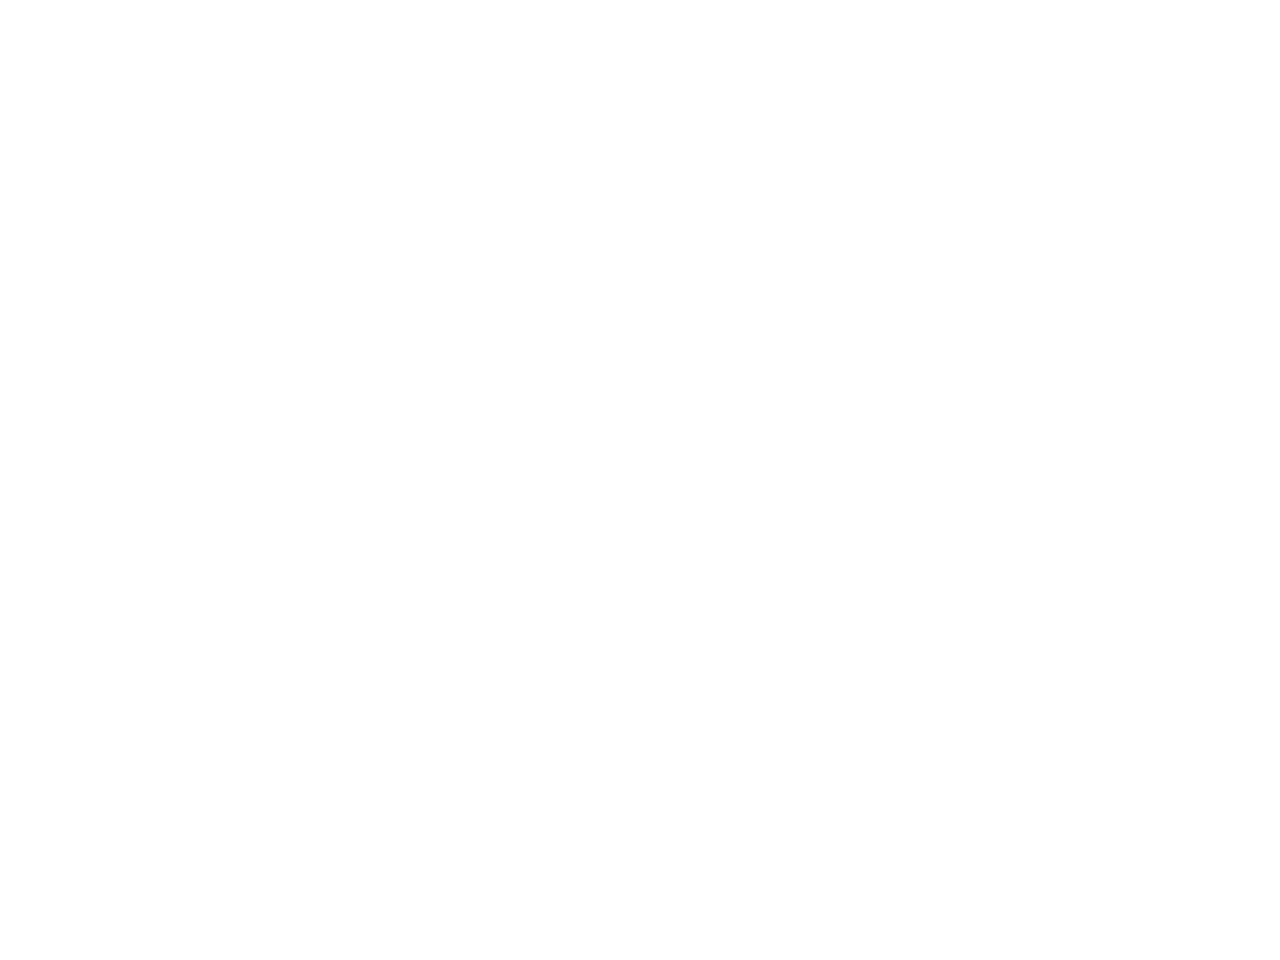

In [7]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

<IPython.core.display.Javascript object>


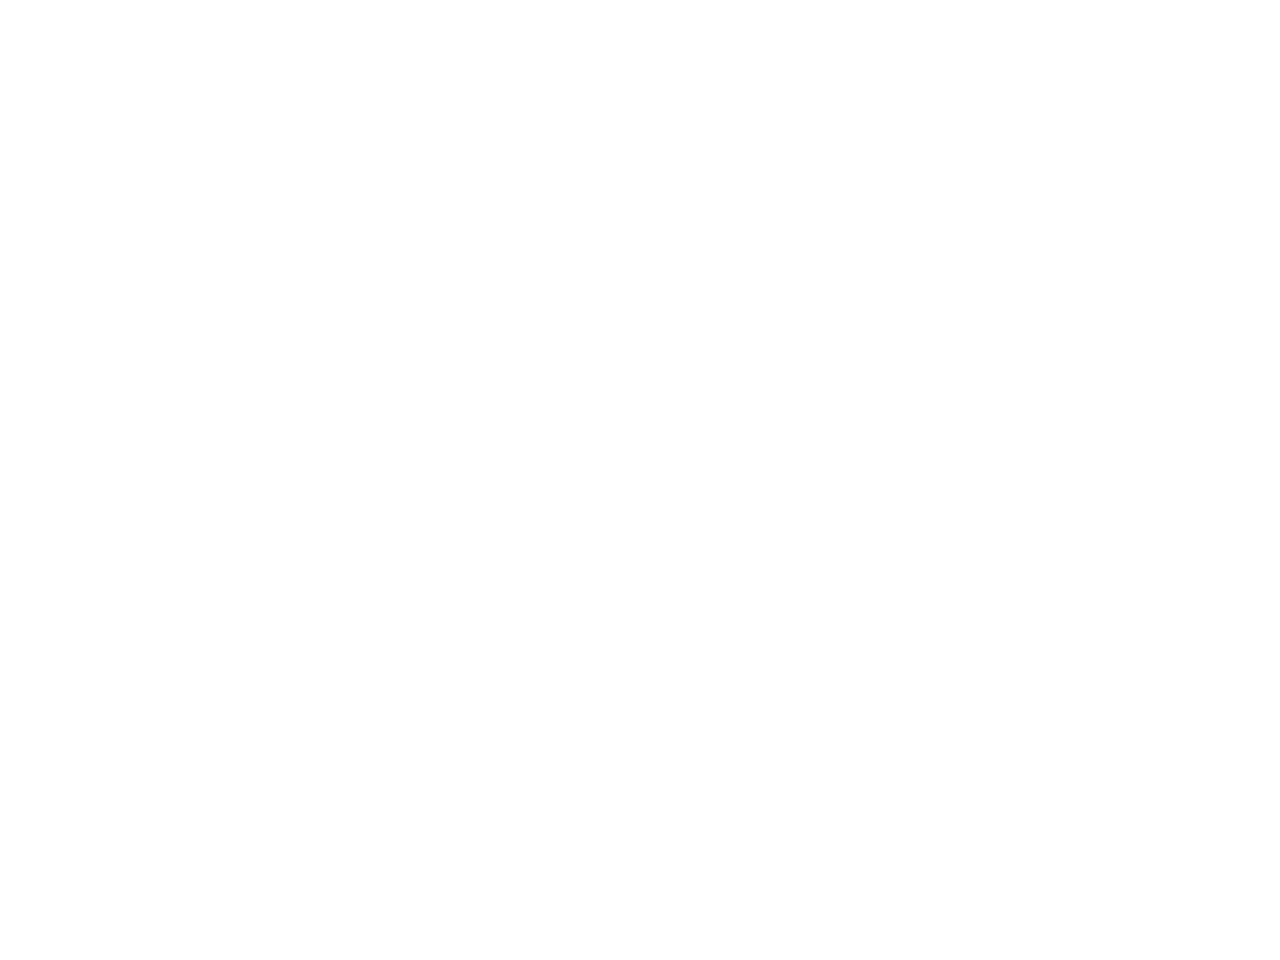

class label of first image :  5
Now converted to the class :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:


plt.figure()
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

print( "class label of first image : ", y_train[0] )

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print( "Now converted to the class : ", y_train[0] )



In [9]:

X_train = X_train.reshape(X_train.shape[0], 
                          X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 
                          X_test.shape[1]* X_test.shape[2])

print("Number of training examples: ", X_train.shape[0],
     "and the image is of the shape (%d)"%(X_train.shape[1]))

X_train = X_train/255
X_test = X_test/255



Number of training examples:  60000 and the image is of the shape (784)


In [10]:
from keras.layers import Activation, Dense
from keras.models import Sequential 

model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10, input_dim=32))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])


In [12]:
training = model.fit(X_train, y_train, batch_size=100, epochs=1000,
                    verbose=0, validation_data=(X_test,y_test))


In [13]:
performance = model.evaluate(X_test, y_test, verbose=0)

print("test score", performance[0]) 
print("test accuracy", performance[1])


test score 0.1270960122346878
test accuracy 0.9686999917030334


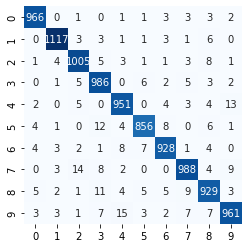

In [14]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred = model.predict(X_test)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c = np.argmax(y_test, axis=1)
matrix_confusion = confusion_matrix(y_test_c, y_pred_c)

sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
plt.show()


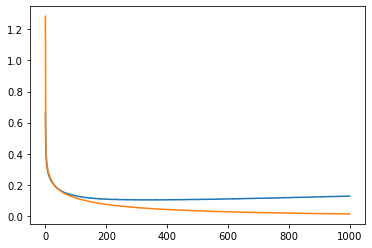

In [15]:
x = list(range(1000))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy )
plt.plot( x, ty )
plt.show()



In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [19]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 26s 60ms/step - loss: 0.3820 - accuracy: 0.8840 - val_loss: 0.0830 - val_accuracy: 0.9773
Epoch 2/15
422/422 [==============================] - 29s 68ms/step - loss: 0.1112 - accuracy: 0.9658 - val_loss: 0.0557 - val_accuracy: 0.9855
Epoch 3/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 4/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0709 - accuracy: 0.9775 - val_loss: 0.0447 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 26s 60ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 0.0408 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0343 - val_accuracy:

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022630317136645317
Test accuracy: 0.9923999905586243


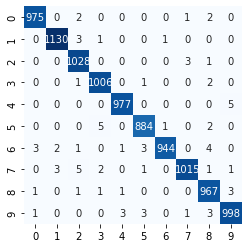

In [21]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred = model.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c = np.argmax(y_test, axis=1)
matrix_confusion = confusion_matrix(y_test_c, y_pred_c)

sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

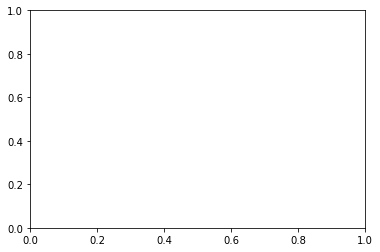

In [22]:
x = list(range(100))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy )
plt.plot( x, ty )
plt.show()

